Gourav Verma<br>
DSC 650<br>
Assignment 10.3 : Using listing 6.27 in Deep Learning with Python as a guide, fit the same data with an LSTM layer.
Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import os
from contextlib import redirect_stdout
import time
start_time = time.time()
from keras.layers import LSTM
# Needed the following as caused CUDA DNN errors
#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

from keras.datasets import imdb
from keras.preprocessing import sequence

In [4]:
imdb_dir = Path('C:/Users/goura/PycharmProjects/dsc650-Forked/data/external/imdb/aclImdb/')
test_dir = os.path.join(imdb_dir, 'test')
train_dir = os.path.join(imdb_dir, 'train')

results_dir = Path('C:/Users/goura/Desktop/GARV ML/DSC 650').joinpath('results').joinpath('model_1')
results_dir.mkdir(parents=True, exist_ok=True)

In [5]:
max_features = 10000
maxlen = 500
batch_size = 32
max_words = 1000
training_samples = 200
validation_samples = 10000

In [6]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [7]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)



print('Loading data... ')


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Loading data... 
Found 87393 unique tokens.
Shape of data tensor: (25000, 500)
Shape of label tensor: (25000,)


In [9]:
#x_train
input_train = data[:training_samples]
#y_train
y_train = labels[:training_samples]

#x_val
input_test = data[training_samples: training_samples + validation_samples]
#y_val
y_test = labels[training_samples: training_samples + validation_samples]

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (200, 500)
input_test shape: (10000, 500)


In [12]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(input_train, y_train, epochs=10, batch_size=32, validation_data=(input_test, y_test))

result_model_file = results_dir.joinpath('pre_trained_glove_model_LSTM.h5')
model.save_weights(result_model_file)

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 26s 129ms/sample - loss: 0.6940 - acc: 0.4750 - val_loss: 0.6920 - val_acc: 0.5308
Epoch 2/10
200/200 [==============================] - 26s 129ms/sample - loss: 0.6874 - acc: 0.6550 - val_loss: 0.6897 - val_acc: 0.5878
Epoch 3/10
200/200 [==============================] - 26s 130ms/sample - loss: 0.6742 - acc: 0.7550 - val_loss: 0.6828 - val_acc: 0.6400
Epoch 4/10
200/200 [==============================] - 26s 130ms/sample - loss: 0.6713 - acc: 0.7850 - val_loss: 0.6675 - val_acc: 0.6594
Epoch 5/10
200/200 [==============================] - 26s 129ms/sample - loss: 0.5904 - acc: 0.9250 - val_loss: 0.6575 - val_acc: 0.5703
Epoch 6/10
200/200 [==============================] - 25s 126ms/sample - loss: 0.5284 - acc: 0.8350 - val_loss: 0.6556 - val_acc: 0.5817
Epoch 7/10
200/200 [==============================] - 26s 130ms/sample - loss: 0.4482 - acc: 0.8450 - val_loss: 0.6329 - val_acc: 

In [13]:
# Save the summary to file
summary_file = results_dir.joinpath('Assignment_10.3_ModelSummary.txt')
with open(summary_file, 'w') as f:
    with redirect_stdout(f):
        model.summary()

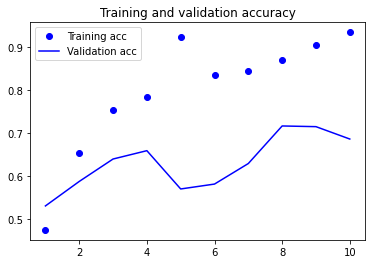

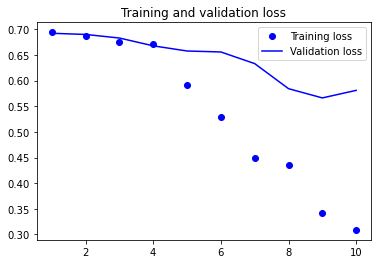

In [14]:
# Place plot here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
img_file = results_dir.joinpath('Assignment_10.3_Model Accuracy Validation.png')
plt.savefig(img_file)
plt.show()